# Probabilidad y estad√≠stica

In [182]:
## Importar paqueter√≠as
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st

## Estad√≠stica descriptiva
---

### Medidas de posici√≥n
Son estad√≠sticas descriptivas que nos indican d√≥nde se encuentran ubicados los datos dentro de una distribuci√≥n. Nos ayudan a entender el centro o la tendencia central de un conjunto de datos.

- **Media o Promedio**: Suma de todos los valores dividida entre el n√∫mero total de valores.
- **Mediana**: Valor que divide al conjunto de datos en dos partes iguales.
- **ModaL**: Valor que m√°s se repite en el conjunto de datos.
- **Cuartiles**: Dividen al conjunto de datos en cuatro partes iguales.
- **Percentiles**: Dividen al conjunto de datos en 100 partes iguales.


In [183]:
# Crear un DataFrame de ejemplo
data = {'Valor': [1, 2, 3, 4, 5, 5, 6, 7, 8, 10]}
df = pd.DataFrame(data)

# Calcular medidas de posici√≥n
media = df['Valor'].mean()
mediana = df['Valor'].median()
moda = df['Valor'].mode()
cuartiles = df['Valor'].quantile([0.25, 0.5, 0.75])

# Imprimir resultados
print('Media:', media)
print('Mediana:', mediana)
print('Moda:', moda)
print('Cuartiles:\n', cuartiles)

Media: 5.1
Mediana: 5.0
Moda: 0    5
Name: Valor, dtype: int64
Cuartiles:
 0.25    3.25
0.50    5.00
0.75    6.75
Name: Valor, dtype: float64


### Medidas de variabilidad
Las medidas de variabilidad nos permiten cuantificar el grado de dispersi√≥n o heterogeneidad de un conjunto de datos. Es decir, nos indican qu√© tan diferentes son los valores entre s√≠.

- **Rango**: Diferencia entre el valor m√°ximo y el valor m√≠nimo de un conjunto de datos.
- **Varianza**: Promedio de las desviaciones cuadr√°ticas de cada dato respecto a la media.
- **Desviaci√≥n** est√°ndar: Ra√≠z cuadrada de la varianza.
- **Coeficiente** de variaci√≥n: Relaci√≥n entre la desviaci√≥n est√°ndar y la media, expresada como porcentaje.
- **Cuartiles y rango intercuart√≠lico**: El rango intercuart√≠lico (IQR) es la diferencia entre el tercer y el primer cuartil.

La **varianza** se puede calcular mediamnte la funci√≥n `var()`. 

In [184]:
## Calcular la varianza
x = [1, 2, 3, 4, 5, 6] # dataset

variance = np.var(x)
print(variance.round(2))

2.92


Para calcular la desviaci√≥n est√°ndar, que es la ra√≠z cuadrada de la varianza, se puede utilizar el m√©todo `describe()` o bien con el m√©todo `std()` de la paqueter√≠a Numpy. 

In [185]:
# Obtener la varianza 
## M√©todo describe()
s = pd.Series([1, 2, 3, 4, 5, 6])
print(s.describe().round(2))
print()

## M√©todo std()
standard_deviation = np.std(x)
print(standard_deviation.round(2))

count    6.00
mean     3.50
std      1.87
min      1.00
25%      2.25
50%      3.50
75%      4.75
max      6.00
dtype: float64

1.71


Para calcular la **covarianza** es necesario calcular la matriz de covarianza utilizando el comando `cov()`. 

In [186]:
## Calcular la cobvarianza
x = [1, 2, 3, 4, 5, 6] # dataset 1
y = [41, 62, 89, 96, 108, 115] # dataset 2

## Calculamos la matriz de covarianza
covariance_matrix = np.cov(x,y)

## Extraemos la covarianza como valor
covariance = covariance_matrix[0][1] 
print(covariance)

51.5


## Probabilidad
---

## Espacio muestral
Se define como **espacio muestral** a el conjunto de todos estos resultados posibles, y se como ***S***. Es necesario tener en cuenta que **todos y cada uno** de los resultados deben incluirse en el espacio muestral. 

En Python, los c√°lculos de probabilidad simples basados en espacios muestrales se pueden realizar f√°cilmente usando el operador l√≥gico `==` y la funci√≥n `len()`.
    1. Con el `==` identifico el evento de mi inter√©s
    2. Con `len()` determino el n√∫mero de eventos de mi inter√©s y el n√∫meor total de eventos

In [187]:
## Creaci√≥n de un df
cool_rock = pd.DataFrame(
    {
        'Artist': [
            'Queen',
            'Queen',
            'Queen',
            'Pink Floyd',
            'Nirvana',
            'AC/DC',
            'AC/DC',
            'Scorpions',
            'Scorpions',
            'Scorpions',
        ],
        'Song': [
            'The Show Must Go On',
            'Another One Bites The Dust',
            'We Will Rock You',
            'Wish You Were Here',
            'Smells Like Teen Spirit',
            'Highway To Hell',
            'Back in Black',
            'Wind Of Change',
            'Still Loving You',
            'Send Me An Angel',
        ],
    }
)
print(cool_rock)

       Artist                        Song
0       Queen         The Show Must Go On
1       Queen  Another One Bites The Dust
2       Queen            We Will Rock You
3  Pink Floyd          Wish You Were Here
4     Nirvana     Smells Like Teen Spirit
5       AC/DC             Highway To Hell
6       AC/DC               Back in Black
7   Scorpions              Wind Of Change
8   Scorpions            Still Loving You
9   Scorpions            Send Me An Angel


¬øCu√°l es la probabilidad de que si pulso aleatorio salga la canci√≥n "Smells Like Teen Spirit"

In [188]:
# Calcular la probabilidad
## Identificar los resultados que satisfacen el evento
interested_song = cool_rock[cool_rock["Song"]=="Smells Like Teen Spirit"]

## Determinar el n√∫mero de resultados que satisfacen el evento
len_song_interested = len(interested_song)

## Contar el tama√±o del espacio muestral.
total_song = len(cool_rock)

## Obtener la probabilidad
print("Por pasos:", len_song_interested/total_song)

## Obtener la probabilidad en un solo comando 
print("Directo:", len(cool_rock[cool_rock["Song"]=="Smells Like Teen Spirit"])/len(cool_rock))


Por pasos: 0.1
Directo: 0.1


### Factoriales 

En probabilidad y estad√≠stica muy a menudo nos encontramos con distintas maneras de organizar o reordenar un conjunto de elementos (**permutaciones**). A veces, es posible que el c√°lculo sea mental, en otras ocasiones no es tan sencillo.  

Ejemplo:    
Una escuela online ofreci√≥ a un estudiante tres cursos gratuitos: 
- ¬øC√≥mo escribir un curr√≠culum eficaz?
- Ayuda profesional en orientaci√≥n profesional.
- ¬°Mejora tus habilidades para las entrevistas!   

Estos cursos pueden tomarse en cualquier orden. ¬øCu√°ntos itinerarios educativos diferentes pueden crearse a partir de estos cursos?. Para ello utilizamos la f√≥rmula

$Pn =n!$

Para calcular el n√∫mero de permutaciones de *n* elementos se utiliza el factorial `!`. Para calcularlo en Python se puede utilizar la funci√≥n `factorial()` del m√≥dulo `math`.

In [189]:
# Importar la funci√≥n factorial del m√≥dulo matem√°tico
from math import factorial

# Definir el n√∫mero necesario de elementos
courses_amount = 3

# Calculae el factorial de 3 (el valor de la variable courses_amount)
result = factorial(courses_amount)

print(result)

6


### Combinaciones
Otra parte importante de la probabilidad y estad√≠stica son las **combinaciones**. Para calcular el n√∫mero de combinaciones de *k* elementos de *n* opciones posibles:

In [190]:
# Definir los valores para las variables n y k
n = 10 # N√∫mero de elementos
k = 3  # N√∫mero de opciones posibles

# Realizar los c√°lculos
combinations = factorial(n) / (factorial(k) * factorial(n-k))
print(combinations)

120.0


Si observamos, la f√≥rmula de permutaci√≥n es similar a la f√≥rmula e combinaciones, donde se le agregan los t√©rminos relacionados con el n√∫mero de combinaciones de *k*.

**Ejercicio 1**    
Est√°s desarrollando con tus amigos un juego de b√∫squeda que consta de 10 tareas diferentes. Las tareas pueden realizarse en cualquier orden, pero solo una secuencia de todas las existentes permite a los jugadores ganar el superpremio. ¬øCu√°l es la probabilidad de ganar el superpremio, suponiendo que la probabilidad de elegir cada tarea en cualquier fase de la b√∫squeda es la misma?

**Resultado 1**   
Son 10 tareas distintas, y aunque dice que puede ser cualquier orden solo 1 secuencia es la ganadora. Por lo tanto la probabilidad ser√≠a 1 serie entre el n√∫mero de eventos posible en orden dado. 

In [191]:
# Definir los valores para las variables n y k
## Solo hay elementos y no hay combinaciones espec√≠ficas, k=0
tasks = 10 # Elementos o n

## Calculo de las permutaciones o combinaciones posibles
permutations = factorial(tasks)
print(permutations)
print() 

## Probabilidad: solo una secuencia permite ganar el superpremio
probability = 1 / permutations

print(probability)

3628800

2.755731922398589e-07


Existen 10 tareas diferentes, por lo tanto, existen 3,628,800 combinaciones diferentes. La probabilidad de ganar el superpremio con la secuencia de tareas ordenadas de manera correcta es inferior al 0.00003%. 

**Ejercicio 2**   
Ahora, los jugadores pueden elegir las tres tareas con las que quieren empezar el juego. El orden de las tareas no importa, lo importante es la combinaci√≥n. Si los jugadores consiguen adivinar la "combinaci√≥n secreta", recibir√°n un c√≥digo promocional de descuento. Por lo tanto  

**Resultado 2**
Son las mismas 10 tareas, solo que ahora tenemos una combinaci√≥n de 3 tareas y las combinaciones no tienen un orden espec√≠fico.

In [192]:
# Definir los valores para las variables n y k
## Existen 10 tareas y se pueden seleccionar 3 tareas con las que empezar
tasks = 10 # Elementos o n
chosen = 3 # Opciones a seleccionar o k

## Calculo de las permutaciones o combinaciones posibles
permutations = factorial(tasks)/(factorial(chosen)*factorial(tasks-chosen))
print(permutations)
print()

## Probabilidad: solo una secuencia permite ganar el superpremio
probability = 1 / permutations

print(probability)

120.0

0.008333333333333333


En esta ocasi√≥n, de las 10 tareas existentes y al seleccionar las tres posibles tareas con las cuales empezar, se tienen 120 opciones disponibles. Esto hace que la probabilidad de obtener un c√≥digo promocional es de casi el 1% 

## Distribuciones
---
La mayor√≠a de las variables aleatorias se modelan en una forma que puede ser descrita por par√°metros. Esto es lo que normalmente llamamos **distribuciones de datos**.

Las distribuciones de datos son una de las piedras angulares de las estad√≠sticas. Las pruebas de hip√≥tesis y la teor√≠a de la probabilidad surgieron del simple concepto de trazar las m√∫ltiples ocurrencias de una variable aleatoria, visualizar su forma y realizar alg√∫n c√°lculo con ella. Las distribuciones nos ayudan a entender:

- ¬øCu√°l es el promedio/valor esperado de una variable aleatoria?
- ¬øCu√°l es la varianza/dispersi√≥n de una variable aleatoria?
- ¬øCu√°l es el rango de valores?

Existen dos tipos de distribuciones **discretas** (toman un cierto n√∫mero de valores) y **cont√≠nuas** (toman un n√∫mero infinitesimal de valores). 

En Python, es posible crear datasets con varios tipos de distribuci√≥n, utilizando la librer√≠a NumPy, capaz de generar n√∫meros aleatorios con una distribuci√≥n espec√≠fica.

El objeto principal es un `ndarray` (array N-dimensional), que es un array multidimensional que contiene elementos del mismo tipo y no puede modificarse durante la ejecuci√≥n del c√≥digo.Para crear ndarray utilizamos la funci√≥n `np.array()`. 

In [193]:
## Creaci√≥n de un ndarray
data = np.array([1, 3, 5, 7, 11, 13, 17, 19, 23, 317])

### Distribuci√≥n normal
Es la distribuci√≥n de probabilidad m√°s com√∫n, forma parte de las distribuciones cont√≠nuas. Describe la probabilidad de que una variable aleatoria tome un valor determinado alrededor de una media,¬†con una desviaci√≥n est√°ndar determinada.

Para crear una distribuci√≥n normal es necesario llamar la funci√≥n `normal()` del m√©todo `random`. 

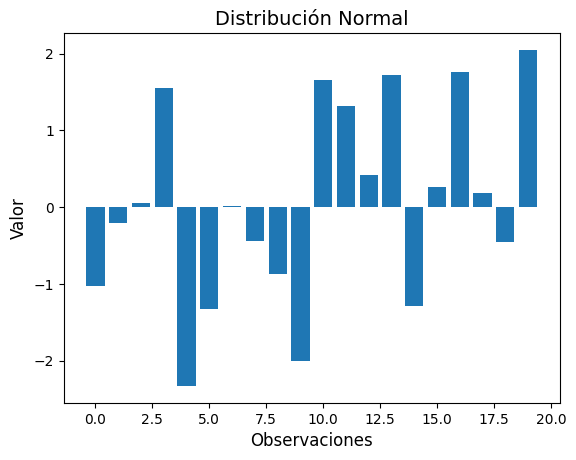

In [194]:
## Generar 20 valores aleatorios
data = np.random.normal(size=20)


# Graficar los datos
plt.bar(range(len(data)), data)
plt.xlabel('Observaciones', fontsize=12)
plt.ylabel('Valor', fontsize=12)
plt.title('Distribuci√≥n Normal', fontsize=14)

# Mostrar la gr√°fica
plt.show()

Esta distribuci√≥n est√° definida por dos par√°metros clave: la **media** (Œº) y la **varianza** (œÉ¬≤). Describe la probabilidad de que una variable aleatoria tome un valor cercano a la media, con una desviaci√≥n est√°ndar espec√≠fica (œÉ).

Es posible generar arrays con media y desviaci√≥n est√°ndar dadas, para ello tenemos que especificarlos dentro de la funci√≥n con los par√°metros `loc` y `scale`, respectivamente. 

[16.37025049 18.18571069 12.23055211 13.86127238  9.18277362 14.80733504
 12.25677229  9.78597226 18.35341775 17.3634952   4.94501468 15.60285787
  6.9860645  13.75694278  8.58581233 10.43237719 14.6640753  16.67195316
 19.03646785 14.51890773]


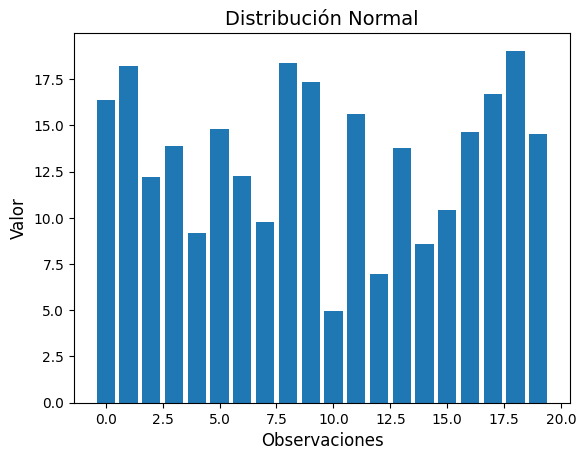

In [195]:
## Generar 20 valores con promedio de 15 y desviaci√≥n est√°ndar de 5
mean = 15  # media entre 1 y 30
std_dev = 5  # desviaci√≥n est√°ndar aleatoria

data = np.random.normal(loc= mean, scale= std_dev, size = 20)
print(data)

# Graficar los datos
plt.bar(range(len(data)), data)
plt.xlabel('Observaciones', fontsize=12)
plt.ylabel('Valor', fontsize=12)
plt.title('Distribuci√≥n Normal', fontsize=14)

# Mostrar la gr√°fica
plt.show()

En Python, es posible realizar c√°lculos con datos que siguen una distribuci√≥n normal utilizando la librer√≠a **SciPy** y su m√≥dulo **stats**.

Para generar una distribuci√≥n normal con par√°metros espec√≠ficos como la media y la desviaci√≥n est√°ndar, se emplea la funci√≥n `stats.norm()`.

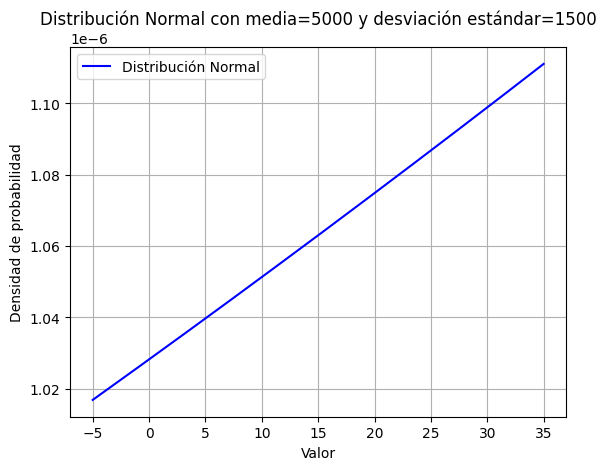

In [196]:
# Datos distribuidos normalmente con una media de 5 000 y una desviaci√≥n est√°ndar de 1500.
## Crear un rango de valores
n = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 1000)

## Distribuci√≥n normal
data = st.norm(5000, 1500)

# Calcular la funci√≥n de densidad de probabilidad (PDF)
pdf = data.pdf(n)

# Calcular la funci√≥n de densidad de probabilidad (PDF)
pdf = data.pdf(n)

# Graficar la PDF (esto dar√° la forma de la campana de Gauss)
plt.plot(n, pdf, label='Distribuci√≥n Normal', color='blue')
plt.title('Distribuci√≥n Normal con media=5000 y desviaci√≥n est√°ndar=1500')
plt.xlabel('Valor')
plt.ylabel('Densidad de probabilidad')
plt.grid(True)
plt.legend()
plt.show()


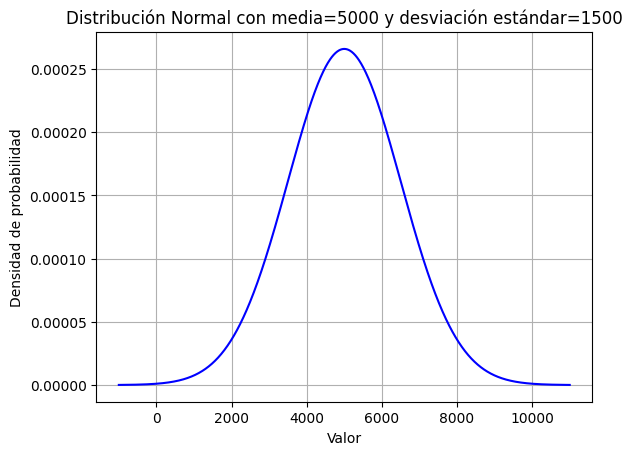

In [197]:
# Par√°metros de la distribuci√≥n normal
mean = 5000
std_dev = 1500

# Crear un rango de valores centrado alrededor de la media, extendido para ver la curva
n = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 1000)

# Distribuci√≥n normal con media 5000 y desviaci√≥n est√°ndar 1500
data = st.norm(mean, std_dev)

# Calcular la funci√≥n de densidad de probabilidad (PDF)
pdf = data.pdf(n)

# Graficar la PDF (esto dar√° la forma de la campana de Gauss)
plt.plot(n, pdf, label='Distribuci√≥n Normal', color='blue')
plt.title('Distribuci√≥n Normal con media=5000 y desviaci√≥n est√°ndar=1500')
plt.xlabel('Valor')
plt.ylabel('Densidad de probabilidad')
plt.grid(True)
plt.show()


Los m√©todos m√°s comunes para trabajar con esta distribuci√≥n incluyen:

- `norm.cdf()`: Calcula la probabilidad de que la variable aleatoria sea menor o igual a un valor dado. Responde a la pregunta: "¬øCu√°l es la probabilidad de que ocurra un valor menor o igual que x?"

- `norm.ppf()`: Devuelve el valor de la variable aleatoria asociado a una determinada probabilidad. Responde a la pregunta: "¬øQu√© valor de x corresponde a una probabilidad acumulada dada?"

**Ejercicio 1**  
El n√∫mero de visitantes mensuales de una tienda virtual tiene una distribuci√≥n normal con una media de 100 500 y una desviaci√≥n est√°ndar de 3 500.

Encuentra la probabilidad de que en el pr√≥ximo mes el sitio web del outlet tenga:

- menos de 92 000 visitantes;
- m√°s de 111 000 visitantes.

In [198]:
## Asignar variables
mu = 100500
sigma= 3500

fewer_threshold=92000
upper_threshold= 111000

## Calculas la probabilidad baja
p_fewer_visitors = st.norm(mu, sigma).cdf(fewer_threshold)

print(round(float(p_fewer_visitors),4)*100)

## Calcula la probabilidad arriba
p_upper_visitors = 1-st.norm(mu, sigma).cdf(upper_threshold)

print(round(float(p_upper_visitors),4)*100)

0.76
0.13


La probabilidad de tener menos de 92,000 visitantes es aproximadamente 0.76%, lo que indica que es bastante improbable que el n√∫mero de visitantes sea tan bajo.

La probabilidad de tener **m√°s de** 111,000 visitantes es alrededor de 0.13%, lo que sugiere que es muy poco probable que el n√∫mero de visitantes exceda este valor en el pr√≥ximo mes.

> [Nota]   
> El CDF devuelve la probabilidad acumulada de que el valor de la variable aleatoria sea **menor o igual** a cierto umbral. Si est√°s buscando la probabilidad de que el valor **sea mayor** a un cierto umbral, es necesario usar el complemento de la CDF. Como la probabilidad total es 1, el complemento $(1 - CDF)$ 

**Ejercicio 2**  
Fancy Pants vende productos de regalo a un p√∫blico muy limitado de clientes corporativos. Las ventas semanales en la tienda de conjuntos de ajedrez de lujo fabricados con colmillo de mamut tienen una distribuci√≥n normal con una media de 420 y una desviaci√≥n est√°ndar de 65.

El equipo de inventario est√° decidiendo cu√°ntos conjuntos pedir. Quieren que la posibilidad de venderlos todos la pr√≥xima semana sea del 90%. ¬øCu√°ntos deben pedir?

**Respuesta 2**  
Nos da datos como la media y la desviaci√≥n estandar. Adem√°s, nos pregunta la cantidad de productos que se tienen que pedir para vender aprox. el 90%. Por lo tanto:  

In [199]:
## Asignar valores dados
mu = 420
sigma = 65
prob= 0.9

## Calcular el valor de la variable aleatoria
n_shipment= st.norm(mu,sigma).ppf(1-prob)

print(round(float(n_shipment), 2))

336.7


Se tienen que pedir 336 art√≠culos para no tener demasiado inventario y maximizar ingresos. 

-----


**Ejercicio 1**   
Tenemos que contar a los estudiantes que obtuvieron resultados: excelente (90 puntos o m√°s), notable (70-89 puntos), satisfactorio (50-69), aprobado (20-49) y que reprobaron (20 o menos). 

**Resultado 1**   
Crea un diccionario summarized_data y escribe c√≥digo para rellenarlo con los datos necesarios.

In [200]:
## Datos
exam_results = np.array(
    [
        42,  56,  59,  76,  43,  34,  62,  51,  50,  65,  
        66,  50,  46,  5,  79, 99,  51,  26,  35,   8,  
        34,  47,  64,  58,  61,  12,  30,  63,  20,  68
    ]
)

## Diccionario con valores iniciales
summarized_data = {'excellent': 0, 
                   'good': 0, 
                   'average': 0, 
                   'passable': 0,  
                   'failed': 0
                  }

## Bucle para sumar a la lista  
for grade in exam_results: 
    if grade >= 90:
        summarized_data["excellent"] +=1
    elif grade >= 70:
        summarized_data["good"] +=1
    elif grade >= 50:
        summarized_data["average"] +=1
    elif grade >= 20:
        summarized_data["passable"] +=1
    else: 
        summarized_data["failed"] +=1
        

## C√≥digo para mostrar los resultados en pantalla.
for result in summarized_data:
    print(result, '-', summarized_data[result])

excellent - 1
good - 2
average - 14
passable - 10
failed - 3


### Binomial 
Describe la probabilidad discreta que describe el n√∫mero de √©xitos en una **secuencia de ensayos** independientes con dos resultados posibles, generalmente denominados ***√©xito y fracaso***.

Si la probabilidad de √©xito es *ùëù*, la probabilidad de fracaso es $1‚àíp$, ya que la suma de las probabilidades siempre es 1, es decir, 100%.

Si solo se realiza un solo experimento, estamos ante una distribuci√≥n sencilla o **experimento de Bernoulli**. La probabilidad en este tipo de distribuciones se determina multiplicando la probabilidaddes individuales de cada resultado. 

**Ejemplo 1**  
Queremos calcular la probabilidad de la combinaci√≥n de √©xito-√©xito-fracaso-fracaso-√©xito (**en ese orden**),

**Resultado 1**   
Entendemos que √©xito es p y fracaso es $1-p$. Por lo tanto: 

$p * p * (1-p) * (1-p) * p$ 

**Ejemplo 2**    
Supongamos que en el 88% de las casos los usuarios hacen su primer clic en un banner publicitario, y en el 12% de los casos hacen clic en otro sitio y acaban en una p√°gina diferente. ¬øCu√°l es la probabilidad de que, de dos usuarios diferentes, uno haga clic en el banner y el otro no?   

**Resultado 2**  
Primer usuario, tiene la probabilidad de 88% y un 12% de no hacerlo, por lo tanto: 

$P=0.88*0.12=0.1056$

si eso lo aplicamos al segundo usuario, entonces: 

$P=(0.88*0.12=0.1056)¬∑2 = 0.2112 = 21.12\%$

Cuando realizamos **m√°s de un experimento**, utilizamos la distribuci√≥n binomial para calcular la probabilidad de obtener un n√∫mero espec√≠fico de √©xitos en n pruebas. En este caso, debemos considerar todas las posibles formas en las que se pueden distribuir k √©xitos entre n ensayos.

Para calcular esta probabilidad, usamos la f√≥rmula:

$P= C k,n  ¬∑  p^k ¬∑  q^(n-k)$

donde: 

- $C k,n$ es el n√∫mero de combinaciones posibles de k √©xitos en n ensayos.
- $p^k$ es la probabilidad de obtener k √©xitos.
- $q^(n-k)$ es la probabilidad de obtener $n - k$ fracasos

**Ejercicio 1**  
Los port√°tiles de Pineapple son caros, pero siguen siendo populares entre los geeks de la inform√°tica: el 60% de los clientes est√°n dispuestos a comprarse una computadora port√°til de esta marca si acuden a la tienda. Los port√°tiles de Banana son m√°s baratos, pero no tan populares: solo el 20% de los visitantes de la tienda est√°n dispuestos a comprarlos.

Supongamos que la tienda solo tiene a la venta equipos de Pineapple. ¬øCu√°l es la probabilidad de que 50 de cada 80 clientes realicen una compra en un d√≠a?

In [201]:
p = 0.6 # la probabilidad de que un cliente realice una compra
q = 0.4 # la probabilidad de que un cliente NO realice una compra
n = 80  # el n√∫mero total de visitantes
k = 50  # el n√∫mero de visitantes que esperamos que realicen una compra

probability = factorial(n) / (factorial(k) * factorial(n-k)) * (p ** k) * (q ** (n-k))

print(probability)

0.0826713508623046


La probabilidad de que exactamente 50 personas compren computadoras port√°tiles es ligeramente superior al 8%. Un  buen resultado para un producto caro. 

**Ejercicio 2**    
Supongamos que, al lado de una tienda de hardware Pineapple, hay un gran centro comercial con otra tienda que vende computadoras Banana. 160 clientes visitan esa tienda durante el d√≠a. ¬øCu√°l es la probabilidad de que 50 de esos visitantes se compren una computadora port√°til?

Recuerda que solo el 20% de los usuarios est√°n dispuestos a comprar un port√°til de la marca Banana.

In [202]:
p = 0.2 # la probabilidad de que un cliente realice una compra
q = 0.8 # la probabilidad de que un cliente NO realice una compra
n = 160# el n√∫mero total de visitantes
k = 50 # el n√∫mero de visitantes que esperamos que realicen una compra

probability = factorial(n) / (factorial(k) * factorial(n - k)) * (p**k) * (q**(n-k)) 

print(probability)

0.00024035993375900262


La probabilidad de que compren este portatil es m√°s de 300 veces menor que el ejemplo pasado. 

In [203]:
## Probabilidades
probs= np.array([0.75, 0.25])

## Opciones


### Distribuci√≥n uniforme
Discreta

Continua

### Distribuci√≥n binomial
Es el experimento de Bernoiulli pero realizado con repeticiones


### Distibuci√≥n normal (Gaussiana)

En Python es posible generar distribuciones normales con par√°metros dados utilizando la funci√≥n `stats.norm()`, con la librer√≠a SciPy. Tambi√©n estudiaremos los m√©todos `norm.cdf` y `norm.ppf`, que permiten: 

| Nombre| Sintaxis| Explicaci√≥n	| Ejemplo|
| ---   | ---    | --- | --- |
|La funci√≥n de distribuci√≥n acumulativa|¬†`norm.cdf()`	|Da la probabilidad de que una variable aleatoria sea menor o igual que un valor determinado |	¬øCu√°l es la probabilidad de que un estudiante pueda aprender una nueva profesi√≥n por menos de 4 000 d√≥lares?|
|La funci√≥n de punto porcentual| 	`norm.ppf()` | Da el valor de la variable aleatoria que corresponde a una determinada probabilidad|	¬øCu√°l es el coste m√°ximo de la formaci√≥n para el 10% de los estudiantes que gastaron menos dinero en sus estudios?| 

In [204]:
## Importar el m√≥dulo stats.
from scipy import stats as st

#¬Æ Crear una distribuidos normal con una media de 5 000 y una desviaci√≥n est√°ndar de 1500.
data = st.norm(5000, 1500)

# Pregunta 1
## Crear una variable para almacenar el coste deseado.
desired_cost = 4000

## Calcular la probabilidad de obtener el valor desired_cost.
probability = data.cdf(desired_cost)

print(probability)

# Pregunta 2
## Establecemos el valor de la probabilidad. Buscaremos el umbral del coste de los estudios 
# para el 10% de los estudiantes que gastaron menos dinero.
target_level = 0.1

## Encontramos el importe que no supere los gastos del 10% de estudiantes que gastaron menos dinero.
cost = data.ppf(target_level)

print(cost)

0.2524925375469229
3077.6726516830995


Ejercicio
La puntuaci√≥n media en el examen del Certificado de an√°lisis de datos es 1000 y la desviaci√≥n est√°ndar es 100. Hay que encontrar la probabilidad de obtener entre 900 y 1 100 puntos en el examen.

¬øQu√© c√≥digo se debe utilizar para ello?
**R**: `st.norm(1000, 100).cdf(1100) - st.norm(1000, 100).cdf(900)`

> El `cdf`siempre ira acompa√±ado a la pregunta ¬øcu√° es la probabilidad?

Encuentra la probabilidad de que en el pr√≥ximo mes el sitio web del outlet tenga:

menos de 92 000 visitantes;
m√°s de 111 000 visitantes.

In [205]:
from scipy import stats as st

mu = 100500
sigma = 3500

more_threshold = 111000
fewer_threshold = 92000

p_more_visitors = 1 - st.norm(mu, sigma).cdf(more_threshold)
p_fewer_visitors = st.norm(mu, sigma).cdf(fewer_threshold)

print(f'Probabilidad de que el n√∫mero de visitantes sea superior a {more_threshold}: {p_more_visitors}')
print(f'Probabilidad de que el n√∫mero de visitantes sea inferior a {fewer_threshold}: {p_fewer_visitors}')

Probabilidad de que el n√∫mero de visitantes sea superior a 111000: 0.0013498980316301035
Probabilidad de que el n√∫mero de visitantes sea inferior a 92000: 0.0075792194387197245


> Si me dan la probabilidad entonces va de la mano del `ppf()`

Fancy Pants, vende productos de regalo a un p√∫blico muy limitado de clientes corporativos. Las ventas semanales en la tienda de conjuntos de ajedrez de lujo fabricados con colmillo de mamut tienen una distribuci√≥n normal con una media de 420 y una desviaci√≥n est√°ndar de 65.

El equipo de inventario est√° decidiendo cu√°ntos conjuntos pedir. Quieren que la posibilidad de venderlos todos la pr√≥xima semana sea del 90%. ¬øCu√°ntos deben pedir?

In [206]:
from scipy import stats as st

mu = 420
sigma = 65
prob = 0.9

n_shipment = st.norm(mu, sigma).ppf(1 - prob)

print('Cantidad de art√≠culos a pedir:', int(n_shipment))

Cantidad de art√≠culos a pedir: 336


### Combinaci√≥n de las distribuciones binomiales y normales


### Distribuci√≥n de Poisson


## Test estad√≠sticos

Los **tests de hip√≥tesis** son m√©todos estad√≠sticos utilizados para evaluar si una afirmaci√≥n sobre un conjunto de datos es razonable o no. A trav√©s del an√°lisis de los datos, se determina si hay suficiente evidencia para rechazar la hip√≥tesis nula en favor de la alternativa, usando medidas como el valor p y un nivel de significancia predefinido (Œ±).

### Usos 
- **Investigaci√≥n cl√≠nica**
- **Pruebas A/B**
- **Selecci√≥n de caracter√≠sticas en ML**

### Pasos 
1. **Definir la hip√≥tesis nula y alternativa**. Se comienza con una hip√≥tesis nula (H‚ÇÄ), que representa una afirmaci√≥n de "no efecto" o "no diferencia", y una hip√≥tesis alternativa (H‚ÇÅ), que sugiere lo contrario. 
2. **Elegir la prueba estad√≠stica adecuada**
3. **Calcular el valor de (*p value*)**
4. **Determinar la significancia estad√≠stica**

### Pruebas estad√≠sticas
Existen diferentes tipos comunes de prueba estad√≠sticas, entre ellas: 

- **T de student**
- **Z test**
- **An√°lisis de varianza (ANOVA)**
- **Chi cuadrada**
- 